In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load data

In [2]:
covid_df = pd.read_csv(".\covid.csv")
covid_df = covid_df.drop(len(covid_df) - 1, axis=0)
covid_df

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566596,1.44E+80,2,1,05-05-2020,02-05-2020,9999-99-99,97,2,46,97,...,2,2,2,2,2,2,2,1,3,97
566597,01ff60,2,1,13-05-2020,03-05-2020,9999-99-99,97,2,58,97,...,2,2,2,2,2,2,2,2,3,97
566598,047cd1,1,1,07-04-2020,06-04-2020,9999-99-99,97,2,48,2,...,2,2,2,2,2,2,2,2,3,97
566599,1beb81,1,2,14-05-2020,01-05-2020,9999-99-99,2,1,49,2,...,2,2,2,2,1,2,2,99,3,2


In [3]:
covid_df['date_died'] = (covid_df['date_died'] != "9999-99-99") * 1
covid_df = covid_df.stack()
covid_df[covid_df == 97] = 0
covid_df[covid_df == 98] = 0
covid_df[covid_df == 99] = 0
covid_df = covid_df.unstack()

In [5]:
covid_df = covid_df.drop(['id', 'entry_date', 'date_symptoms'], axis=1)
covid_df.rename(columns={'date_died':'is_dead'}, inplace=True)

In [6]:
covid_df

,sex,patient_type,is_dead,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,0,0,2,27,0,2,2,2,2,2,2,2,2,2,2,2,1,0
1,2,1,0,0,2,24,0,2,2,2,2,2,2,2,2,2,2,0,1,0
2,1,2,0,2,2,54,2,2,2,2,2,2,2,2,1,2,2,0,1,2
3,2,2,0,2,1,30,0,2,2,2,2,2,2,2,2,2,2,0,1,2
4,1,2,1,2,2,60,2,1,2,2,2,1,2,1,2,2,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566596,2,1,0,0,2,46,0,1,2,2,2,2,2,2,2,2,2,1,3,0
566597,2,1,0,0,2,58,0,1,2,2,2,2,2,2,2,2,2,2,3,0
566598,1,1,0,0,2,48,2,2,2,2,2,2,2,2,2,2,2,2,3,0
566599,1,2,0,2,1,49,2,2,2,2,2,2,2,2,1,2,2,0,3,2


In [7]:
X = covid_df.drop('is_dead', axis=1).to_numpy()
y = covid_df['is_dead'].to_numpy()

In [8]:
X = X.astype(int)
y = np.array([y.astype(int)]).T

In [11]:
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.33)

In [12]:
print(Xtr.shape)
print(Xts.shape)

(379622, 19)
(186979, 19)


In [11]:
'''
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
Xtr = scal.fit_transform(Xtr)
Xts = scal.transform(Xts)
'''

In [93]:
print(Xtr)

[[1 1 0 ... 1 2 0]
 [1 1 0 ... 2 2 0]
 [1 1 0 ... 0 1 0]
 ...
 [2 1 0 ... 0 2 0]
 [1 2 2 ... 0 2 2]
 [2 1 0 ... 0 2 0]]


In [94]:
print(ytr.shape)

(379622, 1)


# Logistic Regression

In [95]:
logreg = LogisticRegression(penalty="l2", solver = 'lbfgs')
logreg.fit(Xtr, ytr)
#solver = 'liblinear'   acc = 0.9430203391824751
#solver='lbfgs'  acc = 0.941923959375117
#solver = 'sag'  acc = 0.9428224559977324
#solver = 'newton-cg' acc = 0.9429989464057461

E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
yhat = logreg.predict(Xts)

In [97]:
yhat = yhat.reshape(yhat.shape[0],1)

In [98]:
acc = np.mean(yhat == yts)
print(acc)

0.9422234582493221


##  Interpreting the weight vector

In [99]:
import matplotlib
import matplotlib.pyplot as plt

<StemContainer object of 3 artists>

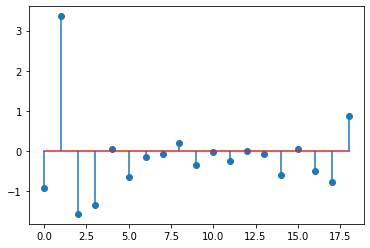

In [100]:
W = logreg.coef_
data = np.squeeze(W)
plt.stem(data,use_line_collection=True)


For the components i which make W[i] is large, these components are more likely to lead to the interpretation of whether COVID-19 patients are at risk of death.


## cross validation in L1-Regularization

In [88]:
from sklearn.model_selection import KFold

In [90]:
nfold = 5
kf = KFold(n_splits=nfold,shuffle=True) 
C = np.linspace(1e1,1e20,5)
acc = np.zeros((5,5))

for i,I in enumerate(kf.split(X)):
    train, test = I
    Xtr_cross = X[train,:]
    ytr_cross = y[train]
    Xts_cross = X[test,:]
    yts_cross = y[test]
    for j,cc in enumerate(C):
        #fit
        logreg_cross = LogisticRegression(penalty = 'l1', C = cc, solver = 'liblinear')
        logreg_cross.fit(Xtr_cross, ytr_cross)
        # predict
        yhat_cross = logreg_cross.predict(Xts_cross)
        acc[j,i] = np.mean(yhat_cross == yts_cross)

acc_mean = np.mean(acc, axis = 1)
acc_max = np.max(acc_mean)
print('Max Accuracy = {0:f}'.format(acc_max))

E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
E:\ANACONDA\lib\

Max Accuracy = 0.905642


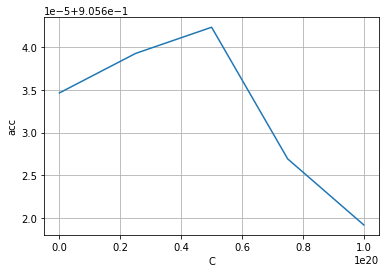

In [101]:
plt.errorbar(C, acc_mean)
plt.xlabel('C')
plt.ylabel('acc')
plt.grid()
plt.show()

By using cross validation, we can see that the max accuracy of logistic regression with l1 Regularization is 0.905642 which is smaller than using l2 penalty to train the model. So when we use logistic regression, we can basically get an 0.94 accuracy of test. 

# SVM

In [18]:
from sklearn import svm

In [10]:
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.5)

In [11]:
print(Xtr.shape)
print(Xts.shape)

(283300, 19)
(283301, 19)


In [12]:
svc = svm.SVC(probability = False, kernel="linear", C=2.8, gamma=.0073,verbose=10)
svc.fit(Xtr, ytr)

E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[LibSVM]

SVC(C=2.8, gamma=0.0073, kernel='linear', verbose=10)

In [14]:
yhat_svc = svc.predict(Xts)


In [17]:
yhat_svc = yhat_svc.reshape(yhat_svc.shape[0],1)


In [18]:
acc_svc = np.mean(yhat_svc == yts)
print(acc_svc)

0.938690650580125


## GridSearchCV

In [13]:
import sklearn.model_selection
from sklearn.model_selection import GridSearchCV

In [14]:
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.33)

In [15]:
ntr = len(ytr)
nts = len(yts)
test_fold = np.hstack((-1*np.ones(ntr), np.zeros(nts)))
ps = sklearn.model_selection.PredefinedSplit(test_fold)

In [16]:
C_test = [0.01,0.1,1,10,100]
gam_test = [0.001,0.01,0.1]

In [19]:
param_grid = {'C': C_test, 'gamma': gam_test, 'kernel': ['rbf']}
clf = GridSearchCV(svm.SVC(), param_grid = param_grid, cv = ps, verbose=15)

In [ ]:
clf.fit(X,y) 

Fitting 1 folds for each of 15 candidates, totalling 15 fits
[CV 1/1; 1/15] START C=0.01, gamma=0.001, kernel=rbf............................


E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1; 1/15] END ..........C=0.01, gamma=0.001, kernel=rbf; total time=61.7min
[CV 1/1; 2/15] START C=0.01, gamma=0.01, kernel=rbf.............................


E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1; 2/15] END ...........C=0.01, gamma=0.01, kernel=rbf; total time=45.3min
[CV 1/1; 3/15] START C=0.01, gamma=0.1, kernel=rbf..............................


E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1; 3/15] END ...........C=0.01, gamma=0.1, kernel=rbf; total time=318.9min
[CV 1/1; 4/15] START C=0.1, gamma=0.001, kernel=rbf.............................


E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1; 4/15] END ...........C=0.1, gamma=0.001, kernel=rbf; total time=93.0min
[CV 1/1; 5/15] START C=0.1, gamma=0.01, kernel=rbf..............................


E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1; 5/15] END ...........C=0.1, gamma=0.01, kernel=rbf; total time=165.2min
[CV 1/1; 6/15] START C=0.1, gamma=0.1, kernel=rbf...............................


E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1; 6/15] END ............C=0.1, gamma=0.1, kernel=rbf; total time=152.1min
[CV 1/1; 7/15] START C=1, gamma=0.001, kernel=rbf...............................


E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1; 7/15] END .............C=1, gamma=0.001, kernel=rbf; total time=51.4min
[CV 1/1; 8/15] START C=1, gamma=0.01, kernel=rbf................................


E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1; 8/15] END .............C=1, gamma=0.01, kernel=rbf; total time=120.6min
[CV 1/1; 9/15] START C=1, gamma=0.1, kernel=rbf.................................


E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1; 9/15] END ..............C=1, gamma=0.1, kernel=rbf; total time=192.6min
[CV 1/1; 10/15] START C=10, gamma=0.001, kernel=rbf.............................


E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1; 10/15] END ...........C=10, gamma=0.001, kernel=rbf; total time=75.2min
[CV 1/1; 11/15] START C=10, gamma=0.01, kernel=rbf..............................


E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1; 11/15] END ...........C=10, gamma=0.01, kernel=rbf; total time=360.4min
[CV 1/1; 12/15] START C=10, gamma=0.1, kernel=rbf...............................


E:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
print("best score is"+ str(clf.best_score_))